/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

['plate_AB13.png', 'plate_AF41.png', 'plate_AG62.png', 'plate_AH23.png', 'plate_AH44.png', 'plate_AH45.png', 'plate_AH47.png', 'plate_AK86.png', 'plate_AN07.png', 'plate_AN12.png', 'plate_AP48.png', 'plate_AQ70.png', 'plate_AX37.png', 'plate_AY00.png', 'plate_AY66.png', 'plate_BC32.png', 'plate_BD48.png', 'plate_BD81.png', 'plate_BE78.png', 'plate_BF43.png', 'plate_BG62.png', 'plate_BI32.png', 'plate_BI59.png', 'plate_BJ31.png', 'plate_BJ55.png', 'plate_BK49.png', 'plate_BL45.png', 'plate_BO72.png', 'plate_BP99.png', 'plate_BU29.png', 'plate_BV38.png', 'plate_BW62.png', 'plate_BX20.png', 'plate_BY58.png', 'plate_BZ55.png', 'plate_BZ83.png', 'plate_CD40.png', 'plate_CH72.png', 'plate_CI66.png', 'plate_CJ19.png', 'plate_CM34.png', 'plate_CM76.png', 'plate_CM86.png', 'plate_CN22.png', 'plate_CO78.png', 'plate_CP22.png', 'plate_CQ25.png', 'plate_CQ87.png', 'plate_CU65.png', 'plate_CZ11.png', 'plate_DC46.png', 'plate_DD06.png', 'plate_DD38.png', 'plate_DD59.png', 'plate_DE81.png', 'plate_DH

Loaded 360 images from folder
Total examples: 1440
Training examples: 1152
Test examples: 288
X shape: (1440, 238, 100, 3)
Y shape: (1440, 36)


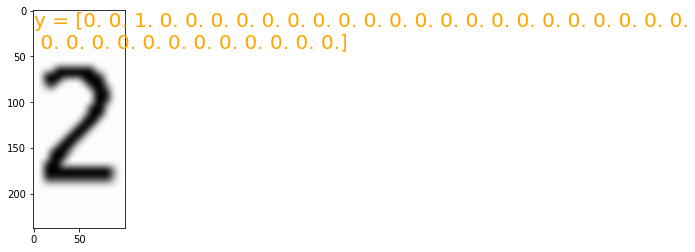

In [1]:
import math
import numpy as np
import re

import tensorflow
import keras 
import jupyter
import cv2

from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image, ImageFont

PIC_PATH = "/home/fizzer/enph353_git/beep-boop/comp/src/license_plate_reader/blurred_plates"
raw_labels = !ls {PIC_PATH}

files_set = [list(filter(None, re.split('\t|\s', raw_label))) for raw_label in raw_labels]
# print(files_set)

files = []
for file in files_set:
  files = files + file
print(files)

labels_split = [list(filter(None, re.split(r'[_,.]', file))) for file in files]

labels = []
for label in labels_split:
  labels.append(label[1])
print(labels)

# # Blurred plates
# PIC_PATH_BLUR = "drive/My\ Drive/Academics/UBC/2019-2020/ENPH353/comp/blurred_plates"
# raw_labels = !ls {PIC_PATH_BLUR}

# files_set_blurred = [list(filter(None, re.split('\t|\s', raw_label))) for raw_label in raw_labels]
# # print(files_set)

# files_blurred = []
# for file in files_set_blurred:
#   files_blurred = files_blurred + file
# print(files_blurred)

# labels_split_blurred = [list(filter(None, re.split(r'[_,.]', file))) for file in files_blurred]

# labels_blurred = []
# for label in labels_split_blurred:
#   labels_blurred.append(label[1])
# print(labels_blurred)

LOAD_PATH = "/home/fizzer/enph353_git/beep-boop/comp/src/license_plate_reader/blurred_plates"
# LOAD_PATH_BLURRED = "drive/My Drive/Academics/UBC/2019-2020/ENPH353/comp/blurred_plates"

imgset = np.array([np.array(Image.open(f'{LOAD_PATH}/{file}'))
                    for file in files[:]])

# imgset_blurred = np.array([np.array(Image.open(f'{LOAD_PATH_BLURRED}/{file}'))
#                     for file in files_blurred[:]])

print("Loaded {:} images from folder".format(imgset.shape[0]))
# print("Loaded {:} images from blurred folder".format(imgset_blurred.shape[0]))

# H_OFFSET = 14
# VT_LIM = 90
# VB_LIM = VT_LIM + 128

all_chars = []

# Initializations to get cuts
interval = 200
start = [50, 350]
l_cuts = np.linspace(start[0], start[0] + interval, num=3, dtype=int)
r_cuts = np.linspace(start[1], start[1] + interval, num=3, dtype=int)

def match_char(img, label, char_imgset):
  
  char_imgs = []
  char_imgs.append(img[30:268,l_cuts[0]:l_cuts[1]])
  char_imgs.append(img[30:268,l_cuts[1]:l_cuts[2]])
  char_imgs.append(img[30:268,r_cuts[0]:r_cuts[1]])
  char_imgs.append(img[30:268,r_cuts[1]:r_cuts[2]])
  # char_imgs.append(img[VT_LIM:VB_LIM,l_cuts[0]-H_OFFSET:l_cuts[1]+H_OFFSET])
  # char_imgs.append(img[VT_LIM:VB_LIM,l_cuts[1]-H_OFFSET:l_cuts[2]+H_OFFSET])
  # char_imgs.append(img[VT_LIM:VB_LIM,r_cuts[0]-H_OFFSET:r_cuts[1]+H_OFFSET])
  # char_imgs.append(img[VT_LIM:VB_LIM,r_cuts[1]-H_OFFSET:r_cuts[2]+H_OFFSET])

  char_labels = []
  for letter in label:
    alpha_num = ord(letter)
    if alpha_num <= 57:
      char_labels.append(alpha_num - 48)
    else:
      char_labels.append(alpha_num - 55)

  ######## Useful print outputs #########

  # print(label)
  # print(char_labels)
  # [print(chr(letter)) for letter in char_labels]

  # cv2_imshow(char_imgs[0])
  # cv2_imshow(char_imgs[1])
  # cv2_imshow(char_imgs[2])
  # cv2_imshow(char_imgs[3])

  [char_imgset.append(np.array([img, label]))
                    for img, label in zip(char_imgs, char_labels)]

char_imgset = []

for img, label in zip(imgset, labels):
  match_char(img, label, char_imgset)

# Shuffle the dataset
np.random.shuffle(char_imgset)

# Generate X and Y datasets
X_dataset_orig = np.array([data[0] for data in char_imgset])
Y_dataset_orig = np.array([[data[1]] for data in char_imgset]).T

NUMBER_OF_LABELS = 36
CONFIDENCE_THRESHOLD = 0.01

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
  
# Normalize X (images) dataset
X_dataset = X_dataset_orig/255.

# Convert Y dataset to one-hot encoding
Y_dataset = convert_to_one_hot(Y_dataset_orig, NUMBER_OF_LABELS).T

VALIDATION_SPLIT = 0.2

print("Total examples: {:d}\nTraining examples: {:d}\nTest examples: {:d}".
      format(X_dataset.shape[0],
             math.ceil(X_dataset.shape[0] * (1-VALIDATION_SPLIT)),
             math.floor(X_dataset.shape[0] * VALIDATION_SPLIT)))
print("X shape: " + str(X_dataset.shape))
print("Y shape: " + str(Y_dataset.shape))

from ipywidgets import interact
import ipywidgets as ipywidgets

# Display images in the training data set. 
def displayImage(index):
  plt.imshow(X_dataset[index])
  caption = ("y = " + str(Y_dataset[index]))#str(np.squeeze(Y_dataset_orig[:, index])))
  plt.text(0.5, 0.5, caption, 
           color='orange', fontsize = 20,
           horizontalalignment='left', verticalalignment='top')

# interact(displayImage, 
#         index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
#                                    step=1, value=10))
displayImage(1)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 236, 98, 32)       896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 49, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 47, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 58, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 8, 128)      

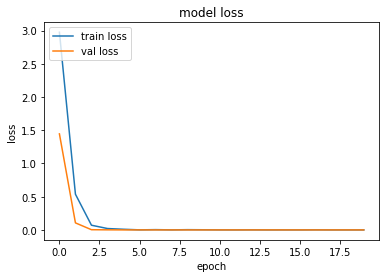

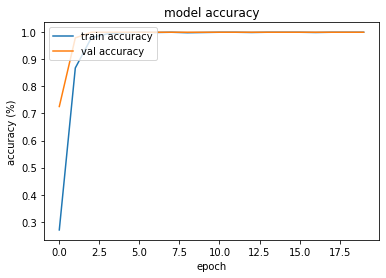

TOP LOSSES:
No errors in predictions!
cp: 'blur_license_plate_model.json' and '/home/fizzer/enph353_git/beep-boop/comp/src/license_plate_reader/blur_license_plate_model.json' are the same file
cp: 'blur_license_plate_model.h5' and '/home/fizzer/enph353_git/beep-boop/comp/src/license_plate_reader/blur_license_plate_model.h5' are the same file
Saved blur_license_plate_model.json and blur_license_plate_model.h5 to comp folder


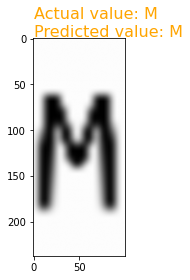

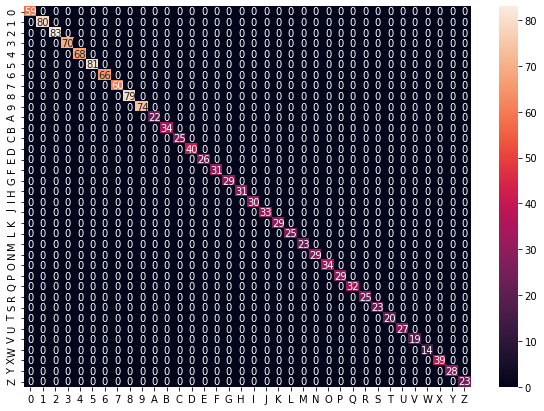

In [2]:
# train model 
from keras import layers
from keras import models
from keras import optimizers

from keras.utils import plot_model
from keras import backend

def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
            
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(238, 100, 3)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))

conv_model.summary()

LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

history_conv = conv_model.fit(X_dataset, Y_dataset, 
                              validation_split=VALIDATION_SPLIT, 
                              epochs=20, 
                              batch_size=16)

plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

# test model
def decode_val(index):
  if(index < 10):
    index += 48
  else:
    index += 55
  
  return chr(index)

# Display images in the training data set. 
def displayImage(index):
  img = X_dataset[index]
  
  img_aug = np.expand_dims(img, axis=0)
  y_predict = conv_model.predict(img_aug)[0]

  actual_index = np.argmax(Y_dataset[index])
  pred_index = np.argmax(y_predict)
  
  plt.imshow(img)  
  caption = ("Actual value: {}\nPredicted value: {}".
             format(decode_val(actual_index), decode_val(pred_index)))
  plt.text(0.5, 0.5, caption, 
           color='orange', fontsize = 16,
           horizontalalignment='left', verticalalignment='bottom')


# interact(displayImage, 
#         index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
#                                    step=1, value=10))
displayImage(355)

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_true = []
y_pred_dataset= []
y_pred = []
CM_labels = []

# Get all predicted values, then perform alphanumeric conversion for predicted value indices
[y_pred_dataset.append(conv_model.predict(np.expand_dims(X_data, axis=0))[0]) for X_data in X_dataset]
[y_pred.append(decode_val(np.argmax(index))) for index in y_pred_dataset]

# Alphanumeric conversion for true value indices
[y_true.append(decode_val(np.argmax(index))) for index in Y_dataset]

# Generate labels for confusion matrix
[CM_labels.append(decode_val(i)) for i in range(0, 36)]

np.set_printoptions(threshold=np.inf)
cm = confusion_matrix(y_true, y_pred, CM_labels)

df_cm = pd.DataFrame(cm, index = [i for i in CM_labels],
                  columns = [i for i in CM_labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

error_count = 0

print("TOP LOSSES:")

for a in range(0, 36):
  for b in range(0, 36):
    if cm[a][b] != 0 and a != b:
      error_count += 1
      print("Number of occurrences: {}". format(cm[a][b]))
      print("Actual value: {}". format(decode_val(a)))
      print("Predicted value: {}\n". format(decode_val(b)))

if error_count == 0:
  print("No errors in predictions!")

# save model
SAVE_PATH = "/home/fizzer/enph353_git/beep-boop/comp/src/license_plate_reader" 
model_json = conv_model.to_json()

# Save model to JSON
with open("blur_license_plate_model.json", "w") as json_file:
    json_file.write(model_json)
# Serialize weights to HDF5
conv_model.save_weights("blur_license_plate_model.h5")

!cp -r blur_license_plate_model.json {SAVE_PATH}
!cp -r blur_license_plate_model.h5 {SAVE_PATH}

print("Saved blur_license_plate_model.json and blur_license_plate_model.h5 to comp folder")